# Train football camera view

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.vision import *
import io
import requests
import csv
import PIL
from torchvision import models, transforms
from torch.autograd import Variable

In [3]:
PATH = Path('/home/jimmy/data/football/football_scoreboard/')

In [4]:
tfms = get_transforms(do_flip=False, flip_vert=False, max_rotate=2, max_zoom=0.0, max_lighting=0.4, 
                      max_warp=0.2)
data = ImageDataBunch.from_folder(PATH, ds_tfms=tfms, valid_pct=0.2, bs=200, size=200)

In [5]:
data.classes

['not_present', 'present']

In [6]:
len(data.train_ds), len(data.valid_ds)

(844, 210)

In [7]:
data.show_batch(rows=4, figsize=(10, 10))

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, pretrained=True).to_fp16()

## Train

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


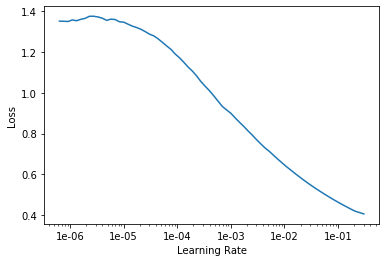

In [9]:
learn.recorder.plot()

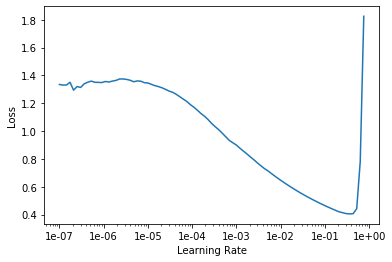

In [10]:
learn.recorder.plot(skip_start=0, skip_end=0)

In [12]:
lr = 1e-1

In [13]:
learn.fit_one_cycle(10, slice(lr))

In [14]:
learn.save('resnet50-stage-1')

In [21]:
learn.load('resnet101-stage-1');

In [22]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


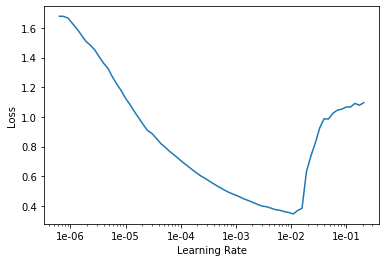

In [24]:
learn.recorder.plot()

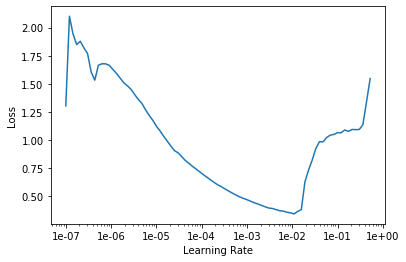

In [25]:
learn.recorder.plot(skip_start=0, skip_end=0)

In [26]:
lr = 1e-3

In [27]:
lrs = slice(lr/100,lr)

In [28]:
learn.fit_one_cycle(10, lrs)

In [30]:
learn.save('resnet50-stage-2')

In [31]:
learn.export('learn_export.pkl')

## Analyse training

In [18]:
learn.load('resnet101-stage-1');

In [1]:
interp = ClassificationInterpretation.from_learner(learn)

NameError: name 'ClassificationInterpretation' is not defined

In [23]:
len(data.classes)

58

In [24]:
1/len(data.classes)*100

1.7241379310344827

In [25]:
interp.plot_confusion_matrix(figsize=(10, 10))

NameError: name 'interp' is not defined

In [98]:
interp.plot_top_losses(9)

## Test inference

In [128]:
empty_data = ImageDataBunch.load_empty(PATH, fname='data-export.pkl')

In [129]:
learn = create_cnn(empty_data, models.resnet101).load('resnet101-stage-2')

In [132]:
img = data.train_ds[0][0]
learn.predict(img_torch)

(Category  white,
 tensor(3),
 tensor([5.6761e-07, 6.1301e-06, 8.5078e-08, 9.9999e-01, 6.4357e-09, 2.0455e-06]))

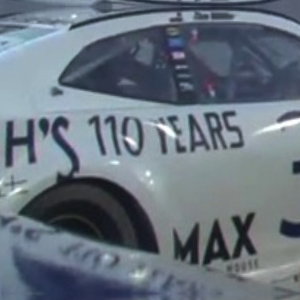

In [133]:
img